  Neste notebook extraí informações dos dados do dataset que escolhi para meu projeto, o "Heart failure clinical records Data Set" do UCI. Esses dados foram coletados de pacientes que foram acompanhados durante períodos diferentes, acompanhados até morrerem ou abandonarem o acompanhamento por qualquer outra razão. Portanto trata-se de dados censurados, ideais para o desenvolvimento de modelos de prognóstico, sendo a previsão do tempo restante para a falha do coração do paciente o propósito do modelo. 
  Alternei as explicações sobre as informações obtidas entre cada bloco de código e gráfico, cada bloco precedido pela explicação de seu propósito e cada gráfico seguido pela interpretação que fiz do que pude observar nele.
  Durante minha análise ignorei o atributo "time" pois ele não deve ser usado aqui já que ele não é relacionado a nenhum outro atributo.

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


A primeira informação que obtive dos dados é a relação entre a quantidade de sódio no sangue e a ocorrência de pressão alta no paciente. Para isso ordenei uma cópia do dataset usando a idade dos pacientes.

In [ ]:
labels = ['serum_sodium', 'age', 'high_blood_pressure']

df_sodium = df.copy()[labels]

df_sodium.sort_values(by=['age'], inplace=True)
df_sodium.head()

,serum_sodium,age,high_blood_pressure
269,132,40.0,0
232,137,40.0,0
180,136,40.0,0
242,136,40.0,0
248,142,40.0,0


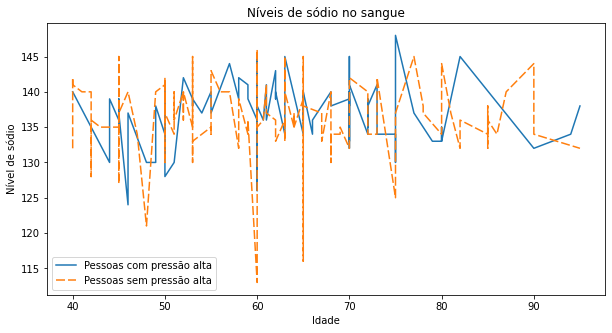

In [ ]:
x1 = df_sodium[df_sodium['high_blood_pressure'] == 1]['age']
x2 = df_sodium[df_sodium['high_blood_pressure'] == 0]['age']
y1 = df_sodium[df_sodium['high_blood_pressure'] == 1]['serum_sodium']
y2 = df_sodium[df_sodium['high_blood_pressure'] == 0]['serum_sodium']

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Níveis de sódio no sangue')
ax.set_ylabel('Nível de sódio')
ax.set_xlabel('Idade')

line1, = ax.plot(x1, y1, label='Pessoas com pressão alta')
line2, = ax.plot(x2, y2, dashes=[6, 2], label='Pessoas sem pressão alta')

ax.legend()
plt.show()

A curva dos hipertensos se mantem acima da dos pacientes que não apresentam pressão alta na maior parte do gráfico. Os trechos em que pacientes hipertensos aparecem com menos sódio no sangue do que pacientes normais sugere que existem outras causas para a pressão alta.

A próxima informação que obtive foi a frequência de fumantes, anêmicos, diabeticos e hipertensos em pacientes que vinheram a óbito enquanto eram acompanhados. Usei dois gráficos de torta, um para cada sexo, pois achei que seria pertinente saber também quais doenças eram mais comuns entre homens e mulheres.

In [ ]:
labels = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'sex']

df_diseases_deaths = df.copy()[df['DEATH_EVENT'] == 1][labels]
df_diseases_deaths.head()

,anaemia,diabetes,high_blood_pressure,smoking,sex
0,0,0,1,0,1
1,0,0,0,0,1
2,0,0,0,1,1
3,1,0,0,0,1
4,1,1,0,0,0


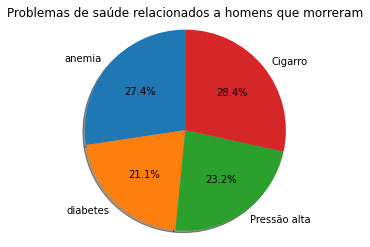

In [ ]:
anemia_h = df_diseases_deaths[df_diseases_deaths['sex'] == 1]['anaemia'].sum(axis=0)
diabetes_h = df_diseases_deaths[df_diseases_deaths['sex'] == 1]['diabetes'].sum(axis=0)
pressao_h = df_diseases_deaths[df_diseases_deaths['sex'] == 1]['high_blood_pressure'].sum(axis=0)
cigarro_h = df_diseases_deaths[df_diseases_deaths['sex'] == 1]['smoking'].sum(axis=0)

anemia_m = df_diseases_deaths[df_diseases_deaths['sex'] == 0]['anaemia'].sum(axis=0)
diabetes_m = df_diseases_deaths[df_diseases_deaths['sex'] == 0]['diabetes'].sum(axis=0)
pressao_m = df_diseases_deaths[df_diseases_deaths['sex'] == 0]['high_blood_pressure'].sum(axis=0)
cigarro_m = df_diseases_deaths[df_diseases_deaths['sex'] == 0]['smoking'].sum(axis=0)

sizes_h = [anemia_h, diabetes_h, pressao_h, cigarro_h]
sizes_m = [anemia_m, diabetes_m, pressao_m, cigarro_m]

fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.set_title('Problemas de saúde relacionados a homens que morreram')
ax1.pie(sizes_h, labels=['anemia', 'diabetes', 'Pressão alta', 'Cigarro'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

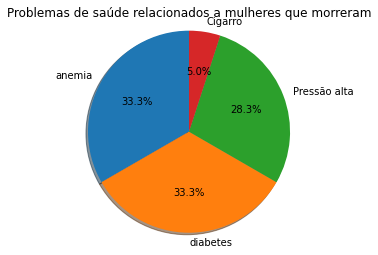

In [ ]:
fig2, ax2 = plt.subplots(figsize=(4,4))
ax2.set_title('Problemas de saúde relacionados a mulheres que morreram')
ax2.pie(sizes_m, labels=['anemia', 'diabetes', 'Pressão alta', 'Cigarro'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
plt.show()

Os gráficos nos mostram que entre os homens os problemas de saúde estão bem distribuídos mas que entre as mulheres há pouca ocorrência de fumantes, sendo anemia e diabetes as doenças mais comuns.

No dataset foi registrado as quantidades de creatinina e creatinofosfoquinase dos pacientes sendo ambas proteínas geradas a partir do metabolismo da creatina. A creatinina é gerada durante a contração muscular, filtrada pelos rins e liberada na urina. Sua concentração no sangue pode indicar problemas renais. A creatinofosfoquinase é usada em testes de sangue como um marcador do infarto do miocárdio, rabdomiólise, distrofia muscular, inflamações musculares autoimunes e falência renal aguda.

Os gráficos abaixo mostram as concentrações de creatinina, creatinofosfoquinase e as quantidades de palquetas no sangue nos pacientes ordenados por idade.

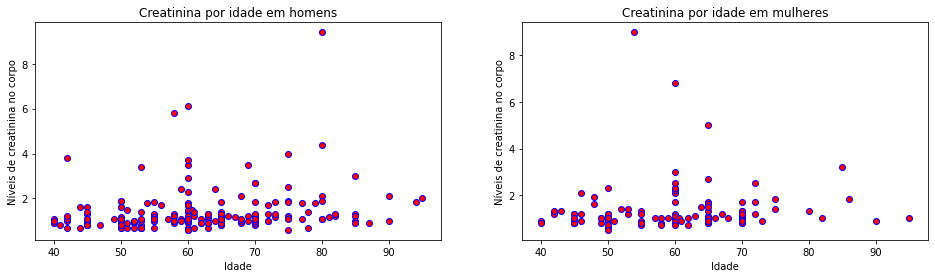

In [ ]:
labels = ['platelets', 'creatinine_phosphokinase', 'serum_creatinine', 'age', 'sex']
death = df.copy()[labels]
death.sort_values(by=['age'], inplace=True)
death_h = death[death['sex'] == 1]
death_m = death[death['sex'] == 0]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
ax1.scatter(x=death_h['age'], y=death_h['serum_creatinine'], marker='o', c='r', edgecolor='b')
ax2.scatter(x=death_m['age'], y=death_m['serum_creatinine'], marker='o', c='r', edgecolor='b')

ax1.set_title('Creatinina por idade em homens')
ax1.set_xlabel('Idade')
ax1.set_ylabel('Níveis de creatinina no corpo')
ax2.set_title('Creatinina por idade em mulheres')
ax2.set_xlabel('Idade')
ax2.set_ylabel('Níveis de creatinina no corpo')

plt.show()

Text(0, 0.5, 'Níveis de plaquetas no corpo')

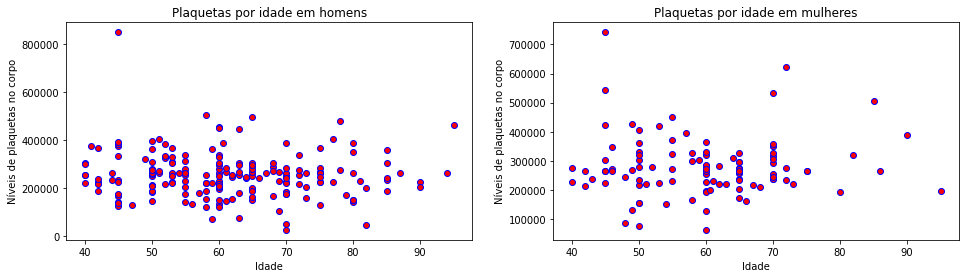

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
ax1.scatter(x=death_h['age'], y=death_h['platelets'], marker='o', c='r', edgecolor='b')
ax2.scatter(x=death_m['age'], y=death_m['platelets'], marker='o', c='r', edgecolor='b')

ax1.set_title('Plaquetas por idade em homens')
ax1.set_xlabel('Idade')
ax1.set_ylabel('Níveis de plaquetas no corpo')
ax2.set_title('Plaquetas por idade em mulheres')
ax2.set_xlabel('Idade')
ax2.set_ylabel('Níveis de plaquetas no corpo')

Text(0, 0.5, 'Níveis de Creatinofosfoquinase no corpo')

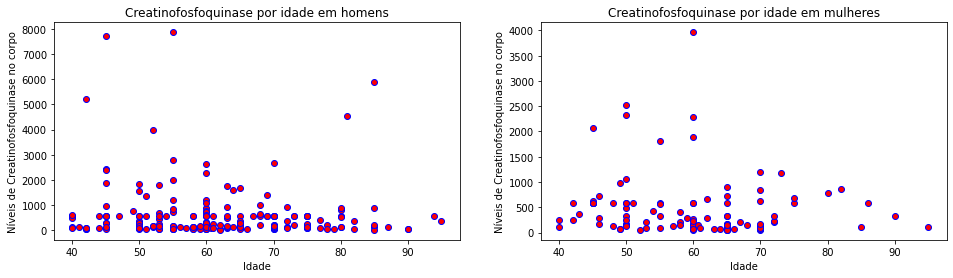

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
ax1.scatter(x=death_h['age'], y=death_h['creatinine_phosphokinase'], marker='o', c='r', edgecolor='b')
ax2.scatter(x=death_m['age'], y=death_m['creatinine_phosphokinase'], marker='o', c='r', edgecolor='b')

ax1.set_title('Creatinofosfoquinase por idade em homens')
ax1.set_xlabel('Idade')
ax1.set_ylabel('Níveis de Creatinofosfoquinase no corpo')
ax2.set_title('Creatinofosfoquinase por idade em mulheres')
ax2.set_xlabel('Idade')
ax2.set_ylabel('Níveis de Creatinofosfoquinase no corpo')

Ficou evidente que pacientes mais velhos produzem menores quantidades dessas proteínas em seus corpos e apresentam menos plaquetas na corrente sanguínea.

Taxa de ejeção é a quantidade de sangue bombeado a cada batida do coração. No código seguinte gerei um gráfico que mostra a relação dessa propriedade com o hábito de fumar dos pacientes do dataset. Mais uma vez usei a idade dos pacientes para mostrar essa relação de acordo com a idade.

In [ ]:
labels = ['ejection_fraction', 'smoking', 'age']
smoking_heart = df.copy()[labels]
smoking_heart.sort_values(by=['age'], inplace=True)
smoking_heart.head()

,ejection_fraction,smoking,age
269,35,0,40.0
232,35,0,40.0
180,30,0,40.0
242,35,1,40.0
248,35,1,40.0


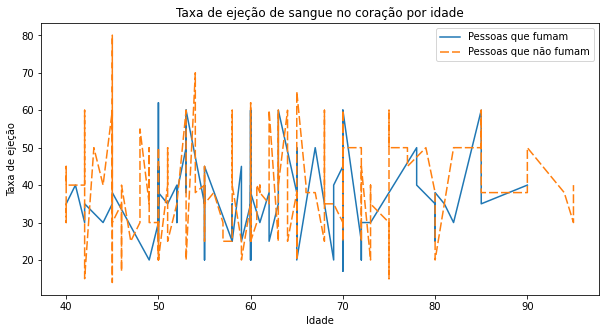

In [ ]:
x1 = smoking_heart[smoking_heart['smoking'] == 1]['age']
x2 = smoking_heart[smoking_heart['smoking'] == 0]['age']
y1 = smoking_heart[smoking_heart['smoking'] == 1]['ejection_fraction']
y2 = smoking_heart[smoking_heart['smoking'] == 0]['ejection_fraction']

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Taxa de ejeção de sangue no coração por idade')
ax.set_ylabel('Taxa de ejeção')
ax.set_xlabel('Idade')

line1, = ax.plot(x1, y1, label='Pessoas que fumam')
line2, = ax.plot(x2, y2, dashes=[6, 2], label='Pessoas que não fumam')

ax.legend()
plt.show()

De acordo com o gráfico, pessoas com idades entre 40 e 50 anos que fumam apresentam menor taxa de ejeção. A partir dos 75 anos essa condição ocorre outra vez.

No código seguinte tento encontrar alguma relação entre anemia, número de plaquetas e a frequência de batimentos cardíacos.

In [ ]:
labels = ['anaemia', 'ejection_fraction', 'platelets']

ejection_fraction_platelets = df.copy()[labels]
ejection_fraction_platelets.sort_values(by=['ejection_fraction'], inplace=True)
ejection_fraction_platelets.head()

,anaemia,ejection_fraction,platelets
17,0,14,166000.0
66,1,15,213000.0
6,1,15,127000.0
210,0,17,389000.0
126,0,17,271000.0


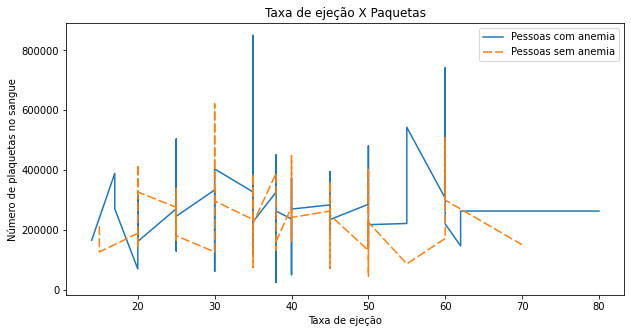

In [ ]:
x1 = ejection_fraction_platelets[ejection_fraction_platelets['anaemia'] == 0]['ejection_fraction']
y1 = ejection_fraction_platelets[ejection_fraction_platelets['anaemia'] == 0]['platelets']
x2 = ejection_fraction_platelets[ejection_fraction_platelets['anaemia'] == 1]['ejection_fraction']
y2 = ejection_fraction_platelets[ejection_fraction_platelets['anaemia'] == 1]['platelets']

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Taxa de ejeção X Paquetas')
ax.set_ylabel('Número de plaquetas no sangue')
ax.set_xlabel('Taxa de ejeção')

line1, = ax.plot(x1, y1, label='Pessoas com anemia')
line2, = ax.plot(x2, y2,dashes=[6, 2], label='Pessoas sem anemia')

ax.legend()
plt.show()

A partir do gráfico consigo concluir que, na maior parte dos casos, pacientes anêmicos diferem dos não anêmicos em quantidade de plaquetas quando apresentam a mesma taxa de ejeção.